In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# print(np.__version__)
# print(pd.__version__)
# print(statsmodels.__version__)
# print(sns.__version__)

# EDA

In [123]:
df = pd.read_csv('../data/raw/dataset_with_raw_data.csv', parse_dates=True, index_col=0)

In [124]:
df.describe(include='all')

lme_price     lme_volume   lme_change  alcoa_price  alcoa_volume  \
count  1471.00000    1453.000000  1471.000000  1464.000000  1.464000e+03   
mean   2187.99983   72970.750172     0.007260    35.655089  1.228803e+06   
std     425.51677   90265.238472     1.369461    16.842623  1.716327e+06   
min    1462.00000    1120.000000    -7.170000     5.500000  2.691600e+04   
25%    1839.00000   30470.000000    -0.810000    22.167500  1.773955e+05   
50%    2167.50000   41130.000000    -0.020000    35.380000  3.178370e+05   
75%    2407.00000   58300.000000     0.765000    47.392500  2.178433e+06   
max    3849.00000  819110.000000     6.230000    96.480000  1.854933e+07   

       export_australia_value  import_australia_value  australia_inflation  \
count               69.000000               69.000000            24.000000   
mean               336.968058              180.374884             3.150000   
std                 79.795887               34.926148             2.334617   
min                193.548000               99.640000            -0.300000   
25%                282.968000              160.504000             1.675000   
50%                320.597000              177.890000             2.000000   
75%                402.592000              199.207000             5.175000   
max                547.871000              262.540000             7.800000   

       australia_pmi  australia_resources  baltic_dry_index  \
count      70.000000            23.000000       1452.000000   
mean       53.301429           686.347826       1659.706612   
std         3.546768          2405.067257        868.836796   
min        44.000000         -3488.000000        393.000000   
25%        50.350000          -649.000000       1124.000000   
50%        53.700000           548.000000       1443.000000   
75%        55.700000          1950.000000       1983.250000   
max        60.400000          6570.000000       5650.000000   

       bloomberg_metals_price  bloomberg_metals_change  export_brazil_value  \
count             1467.000000              1467.000000            69.000000   
mean               138.313940                 0.007900            90.771942   
std                 26.361153                 1.266815            32.104042   
min                 90.000000                -4.370000            43.542000   
25%                116.165000                -0.765000            65.227000   
50%                136.340000                 0.050000            81.343000   
75%                156.745000                 0.740000           116.793000   
max                239.050000                11.280000           179.196000   

          brazil_gdp  import_brazil_value  brazil_inflation  brazil_pmi  \
count      22.000000            69.000000         70.000000   70.000000   
mean   304024.990909           177.955551          5.470571   51.900000   
std     11686.390428            40.144312          2.874906    5.090571   
min    270773.200000           102.312000          1.880000   36.000000   
25%    298448.825000           153.119000          3.317500   49.825000   
50%    302722.500000           172.468000          4.500000   51.750000   
75%    311180.075000           210.309000          6.687500   53.400000   
max    325566.600000           292.133000         12.130000   66.700000   

       brazil_resources  chalco_price   chalco_adj  chalco_volume  \
count         23.000000   1429.000000  1429.000000   1.429000e+03   
mean       -1597.707391      3.387180     3.314719   3.695045e+07   
std        52723.171955      1.085459     1.060317   3.109708e+07   
min      -103661.048000      1.400000     1.397060   0.000000e+00   
25%       -23938.360500      2.610000     2.549879   1.699580e+07   
50%        -5057.138000      3.250000     3.175137   2.681201e+07   
75%        20122.629000      4.220000     4.142561   4.621304e+07   
max       152052.768000      7.330000     7.043919   2.477288e+08   

       china_bid_value  export_china_value

In [126]:
# В данных замечено небанальное значение минимума для объема торгов акциями компании Chalco и Hongqiao (в общем фрейме атрибут chalco_volume и hongqiao_volume)
df['chalco_volume'] = df['chalco_volume'].replace(0, df['chalco_volume'].median())
df['hongqiao_volume'] = df['hongqiao_volume'].replace(0, df['chalco_volume'].median())

# Заменим нулевые значения медианой данного атрибута
# Почему не скользящим средним, как предложил куратор Сергей? Параметр объема торгов ведет себя буквально рандомно, поэтому медиана

In [127]:
(df.isna().sum()/len(df)).sort_values()

USD_EUR_rate                 0.285513
DXY_rate                     0.285513
USD_CLP_rate                 0.285513
USD_JPY_rate                 0.285513
USD_CNY_rate                 0.287857
rub_to_cny_change            0.287857
rub_to_cny                   0.287857
usd_to_hkd                   0.288326
USD_RUB_rate                 0.306142
lme_price                    0.310361
lme_change                   0.310361
bloomberg_metals_price       0.312236
bloomberg_metals_change      0.312236
sp_metals_change             0.313174
sp_metals_price              0.313174
alcoa_price                  0.313643
alcoa_volume                 0.313643
kaiser_price                 0.314580
china_bid_value              0.314580
kaiser_volume                0.314580
norsk_hydro_volume           0.315049
norsk_hydro_adj              0.315049
norsk_hydro_price            0.315049
mosexchange_value            0.317862
lme_volume                   0.318800
baltic_dry_index             0.319269
rual_price_c

In [ ]:
# Множество параметров имеет пропущенные значения, но вызвано это природой этих параметров,
# многие параметры носят ежемесячный характер, потому и возникает такое количество
# пропущенных значений в ежедневном масштабе

<Axes: ylabel='date'>

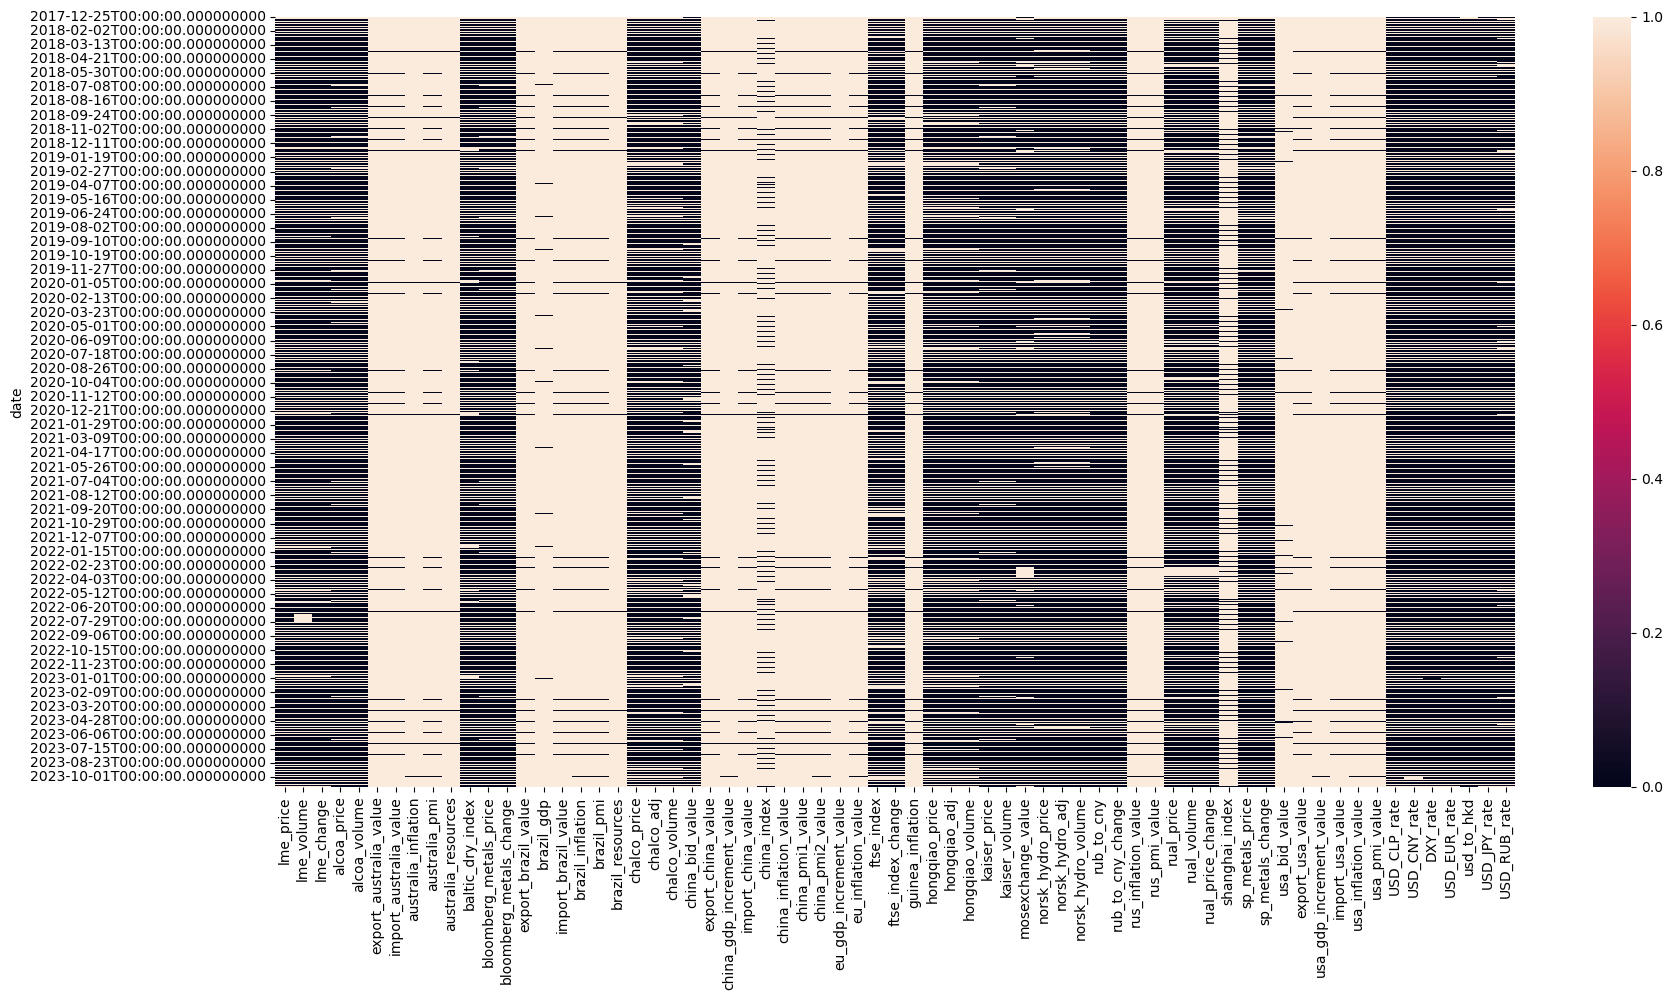

In [128]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

В некоторых колонках значение выпало на выходной (обычно это данные, которые обновляются помесячно и записываются в первый или последний день месяца)  
Можно интерполировать во времени в том числе и для выходных, все равно впоследствии будет произведен переход на еженедельные данные с агрегацией среднего или медианы, что не вызовет искажения в распределении данных

In [129]:
df.columns

Index(['lme_price', 'lme_volume', 'lme_change', 'alcoa_price', 'alcoa_volume',
       'export_australia_value', 'import_australia_value',
       'australia_inflation', 'australia_pmi', 'australia_resources',
       'baltic_dry_index', 'bloomberg_metals_price', 'bloomberg_metals_change',
       'export_brazil_value', 'brazil_gdp', 'import_brazil_value',
       'brazil_inflation', 'brazil_pmi', 'brazil_resources', 'chalco_price',
       'chalco_adj', 'chalco_volume', 'china_bid_value', 'export_china_value',
       'china_gdp_increment_value', 'import_china_value', 'china_index',
       'china_inflation_value', 'china_pmi1_value', 'china_pmi2_value',
       'eu_gdp_increment_value', 'eu_inflation_value', 'ftse_index',
       'ftse_index_change', 'guinea_inflation', 'hongqiao_price',
       'hongqiao_adj', 'hongqiao_volume', 'kaiser_price', 'kaiser_volume',
       'mosexchange_value', 'norsk_hydro_price', 'norsk_hydro_adj',
       'norsk_hydro_volume', 'rub_to_cny', 'rub_to_cny_change',
  

In [112]:
# Для ежемесячных и еженедедельных данных, отражающих прошедший период, используем заполнение пропусков с помощью bfill()
# Для ежедневных данных, прерывающихся преимущественно по выходным, используем линейную интерполяцию с методом 'time',
# чтобы данные заполнялись с учетом дня

In [130]:
df_bfill = df.loc[:,('china_index', 'shanghai_index',
                     'export_australia_value', 'import_australia_value', 'australia_inflation', 'australia_pmi', 'australia_resources',
                     'brazil_gdp', 'export_brazil_value', 'import_brazil_value', 'brazil_inflation', 'brazil_pmi', 'brazil_resources',
                     'china_gdp_increment_value', 'export_china_value', 'import_china_value',
                     'china_inflation_value', 'china_bid_value', 'china_pmi1_value', 'china_pmi2_value',
                     'eu_gdp_increment_value', 'eu_inflation_value',
                     'guinea_inflation',
                     'rus_inflation_value', 'rus_pmi_value',
                     'usa_gdp_increment_value', 'export_usa_value', 'import_usa_value',
                     'usa_inflation_value', 'usa_pmi_value', 'usa_bid_value')].bfill()

In [131]:
df_interpol = df.loc[:,('lme_price', 'lme_volume', 'lme_change',
                        'baltic_dry_index', 'bloomberg_metals_price', 'bloomberg_metals_change',
                        'ftse_index', 'ftse_index_change', 'sp_metals_price', 'sp_metals_change', 'mosexchange_value',
                        'alcoa_price', 'alcoa_volume', 'chalco_price', 'chalco_adj', 'chalco_volume', 
                        'hongqiao_price', 'hongqiao_adj', 'hongqiao_volume', 'kaiser_price', 'kaiser_volume', 
                        'norsk_hydro_price', 'norsk_hydro_adj', 'norsk_hydro_volume',
                        'rual_price', 'rual_volume','rual_price_change',
                        'rub_to_cny', 'rub_to_cny_change', 'usd_to_hkd',
                        'USD_CLP_rate', 'USD_CNY_rate', 'DXY_rate', 
                        'USD_EUR_rate', 'USD_JPY_rate', 'USD_RUB_rate')].interpolate(method='time', limit_area='inside')

In [132]:
df_after_fillna = pd.concat([df_interpol, df_bfill], axis=1)

In [133]:
df_after_fillna.isna().sum()[df_after_fillna.isna().sum()!=0]

lme_price                      9
lme_volume                     9
lme_change                     9
baltic_dry_index               8
bloomberg_metals_price         8
bloomberg_metals_change        8
ftse_index                     8
ftse_index_change              8
sp_metals_price                8
sp_metals_change               8
mosexchange_value              1
alcoa_price                    8
alcoa_volume                   8
chalco_price                   9
chalco_adj                     9
chalco_volume                  9
hongqiao_price                 9
hongqiao_adj                   9
hongqiao_volume                9
kaiser_price                   8
kaiser_volume                  8
norsk_hydro_price              8
norsk_hydro_adj                8
norsk_hydro_volume             8
rual_price                     9
rual_volume                    9
rual_price_change              9
rub_to_cny                     8
rub_to_cny_change              8
usd_to_hkd                     8
USD_CLP_ra

<Axes: ylabel='date'>

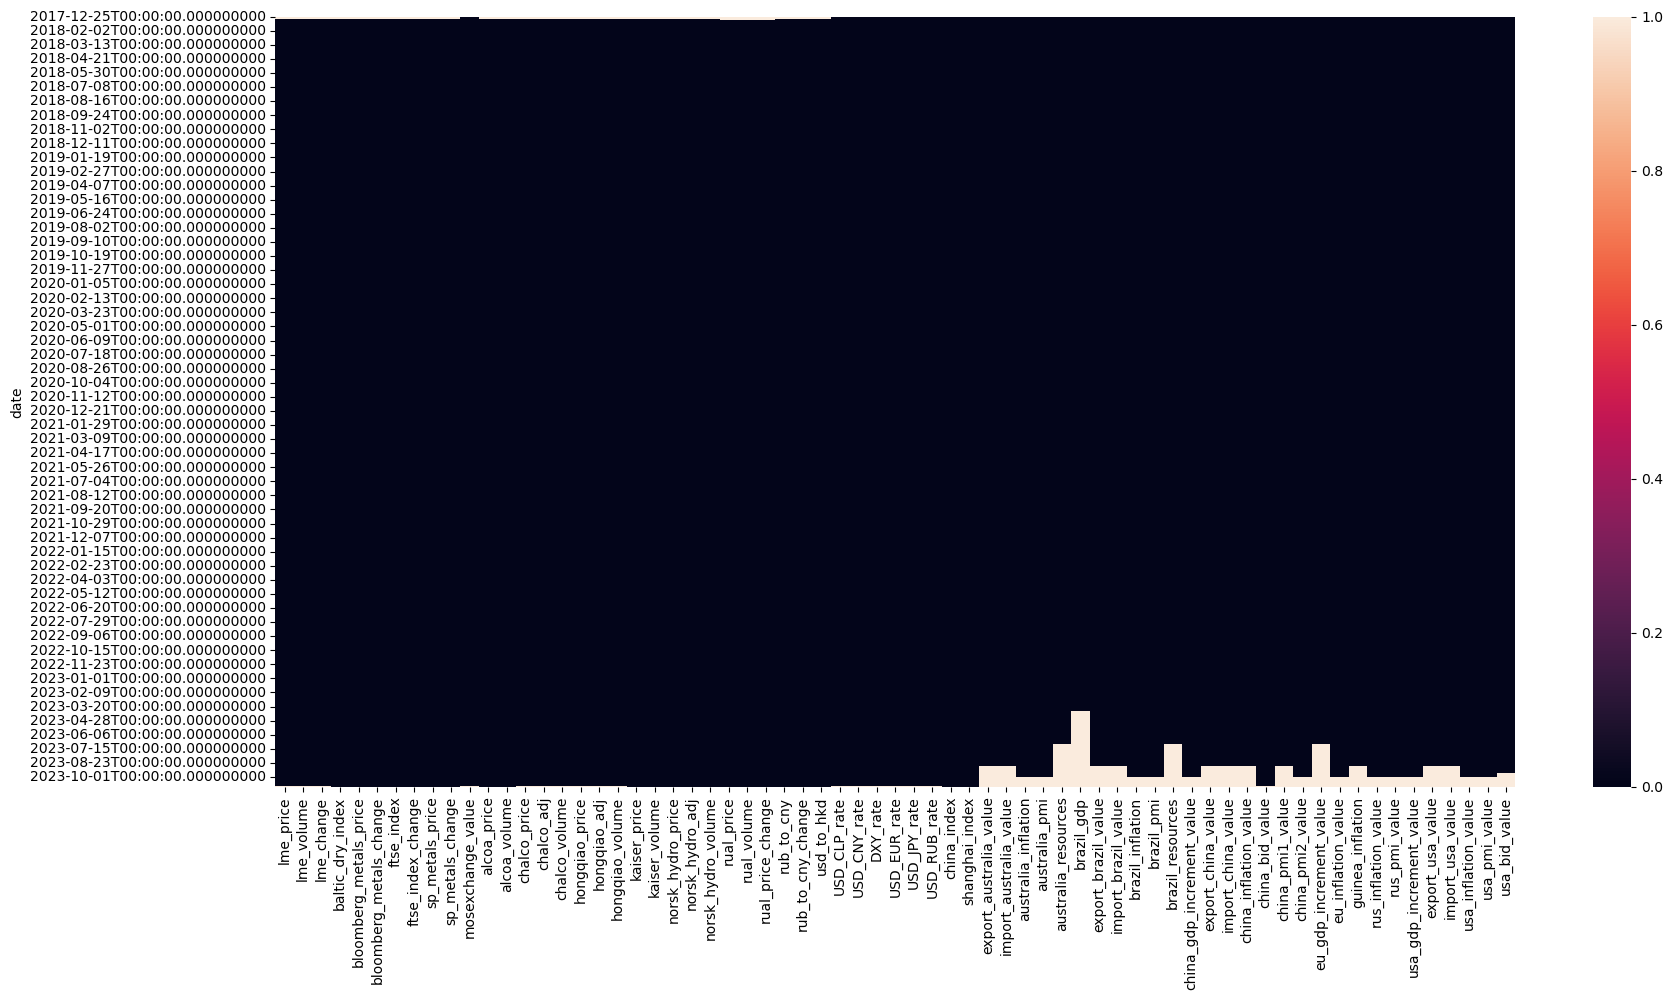

In [134]:
plt.figure(figsize=(20,10))
sns.heatmap(df_after_fillna.isna())

In [113]:
# Можно заметить, что пустыми остались данные, которые на момент сбора данных (27-28 октября) отсутствовали, то есть поступают с задержкой

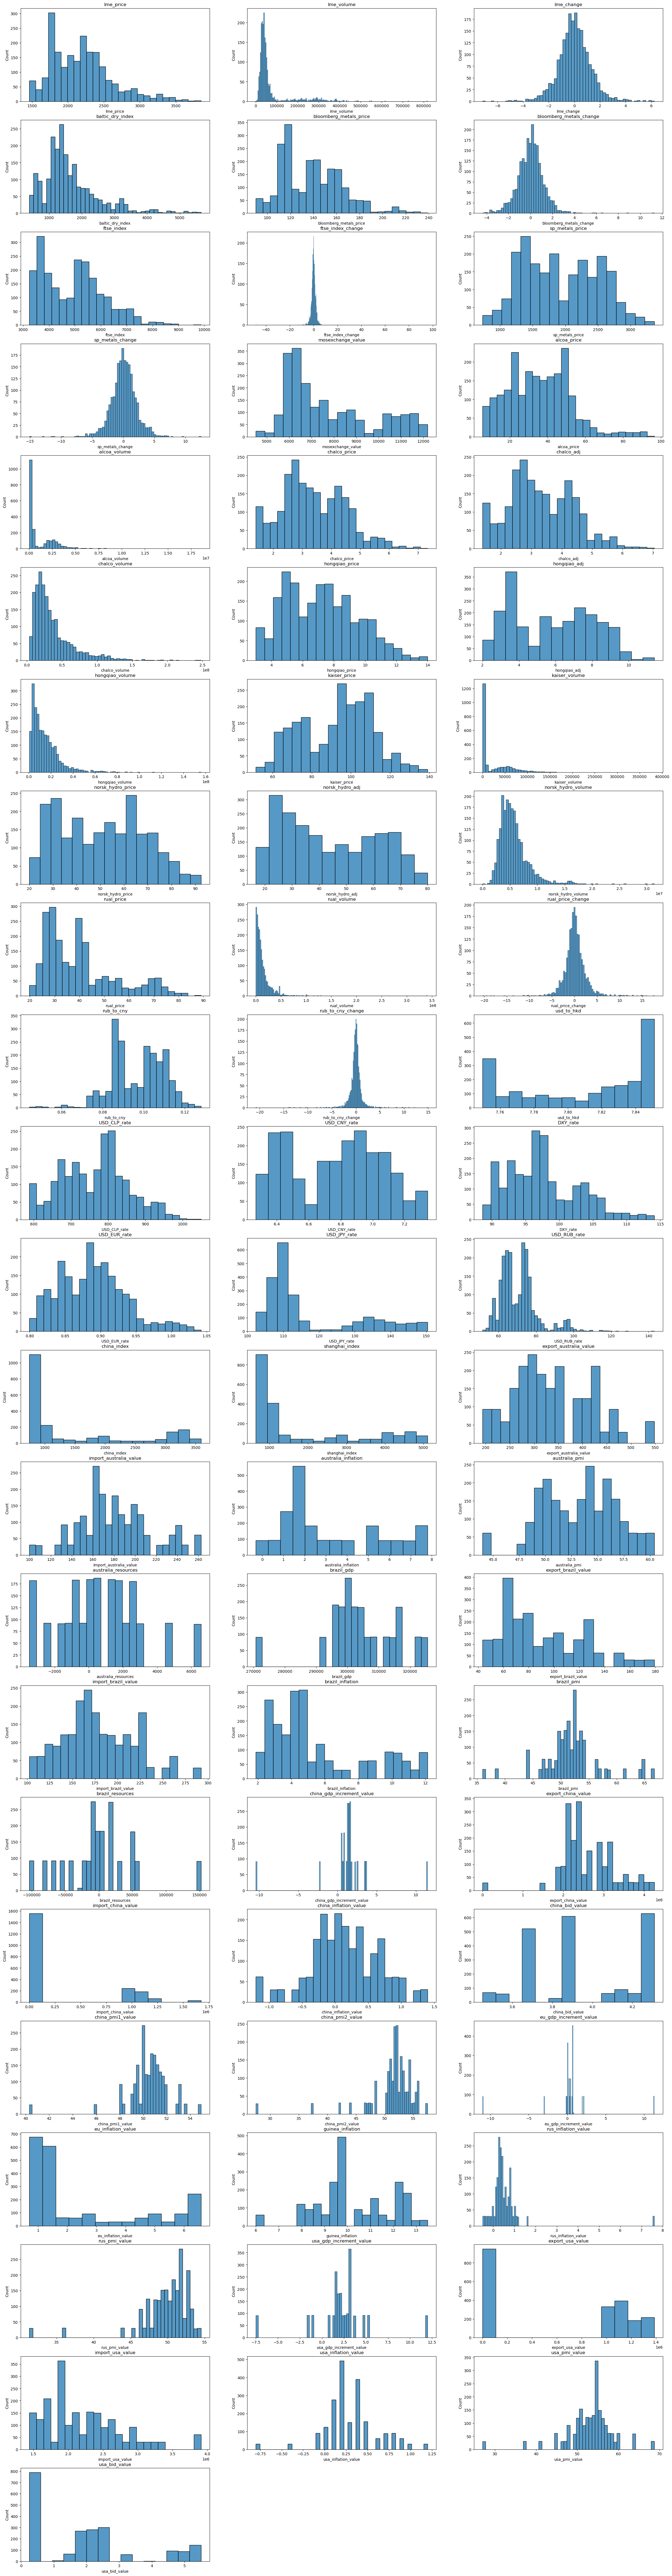

In [135]:
fig = plt.figure(figsize=(30,120))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in df_after_fillna.columns:
    plt.subplot(23,3,k)
    sns.histplot(df_after_fillna, x=str(i))
    plt.title(i)
    k+=1
# plt.savefig('distributions.png', dpi=400)

In [ ]:
# Анализ гистограмм распределения параметров позволяет сделать вывод, что данные извлечены без ошибок, выбросов нет, диапазоны значений кондиционные

In [177]:
# Произведем агрегацию данных в недельные дискреты
dataset_per_week = df_after_fillna.reset_index().groupby([pd.Grouper(key='date', freq='W')]).mean()

In [178]:
dataset_per_week

lme_price    lme_volume  lme_change  baltic_dry_index  \
date                                                                  
2017-12-31          NaN           NaN         NaN               NaN   
2018-01-07  2220.333333  40093.333333   -1.088333       1326.666667   
2018-01-14  2188.428571  52920.000000    0.400000       1324.428571   
2018-01-21  2219.250000  24987.142857    0.122857       1166.714286   
2018-01-28  2243.964286  11735.714286    0.125714       1193.571429   
...                 ...           ...         ...               ...   
2023-10-01  2286.785714  65544.285714    0.948571       1702.142857   
2023-10-08  2258.571429  53562.857143   -0.604286       1853.000000   
2023-10-15  2206.785714  42285.714286   -0.380000       1959.857143   
2023-10-22  2180.500000  38867.142857   -0.174286       2045.000000   
2023-10-29  2195.875000  41720.000000    0.187500       1804.600000   

            bloomberg_metals_price  bloomberg_metals_change   ftse_index  \
date                                                                       
2017-12-31                     NaN                      NaN          NaN   
2018-01-07              136.576667                -0.556667  5925.730000   
2018-01-14              135.854286                 0.073214  5912.715714   
2018-01-21              135.947143                 0.044643  5738.675714   
2018-01-28              138.122857                 0.311429  5899.810000   
...                            ...                      ...          ...   
2023-10-01              141.880000                 0.194286  4844.472727   
2023-10-08              139.278571                -0.318571  4836.127273   
2023-10-15              137.274286                -0.327143  4814.168571   
2023-10-22              136.197143                -0.085714  4651.592857   
2023-10-29              136.814000                 0.284000  4629.970000   

            ftse_index_change  sp_metals_price  sp_metals_change  \
date                                                               
2017-12-31                NaN              NaN               NaN   
2018-01-07           0.680000      1886.516667          0.798333   
2018-01-14          -0.545714      1923.292857          0.219286   
2018-01-21          -0.047143      1931.792857         -0.132143   
2018-01-28           0.377143      1943.928571          0.051429   
...                       ...              ...               ...   
2023-10-01          -0.200260      2658.542857         -0.147143   
2023-10-08          -0.025455      2592.371429         -0.048571   
2023-10-15          -0.457143      2617.614286          0.057143   
2023-10-22          -1.014286      2557.457143         -0.747143   
2023-10-29           0.572000      2510.200000          0.186000   

            mosexchange_value  alcoa_price  alcoa_volume  chalco_price  \
date                                                                     
2017-12-31        5784.003429          NaN           NaN           NaN   
2018-01-07        5963.855500    54.508333  3.207585e+06      5.970000   
2018-01-14        6033.078929    55.765714  3.580469e+06      5.721429   
2018-01-21        6065.811429    54.394286  6.166439e+06      5.577143   
2018-01-28        6070.498571    53.238571  3.052764e+06      5.837143   
...                       ...          ...           ...           ...   
2023-10-01        8090.870000    27.670714  2.055354e+05      4.385714   
2023-10-08        8140.408571    27.369286  1.589646e+05      4.225714   
2023-10-15        8195.837143    27.398571  1.410430e+05      4.244286   
2023-10-22        8268.428571    25.244286  2.633821e+05      4.011786   
2023-10-29        8253.817500    23.660000  2.233084e+05      3.863125   

            chalco_adj  chalco_volume  hongqiao_price  hongqiao_adj  \
date                                                                  
2017-12-31         NaN            NaN             NaN           NaN   
2018-01-07    5.827597   4.349663e+07   

In [179]:
dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>8]
# Заметим, что лаг для australia_resources, brazil_gdp, brazil_resources, eu_gdp_increment_value слишком велик, при смещении мы потеряем много данных от тренировочного набора

australia_resources       17
brazil_gdp                30
brazil_resources          17
eu_gdp_increment_value    17
dtype: int64

In [180]:
# Удалим данные параметры
dataset_per_week.drop(columns=['australia_resources', 'brazil_gdp', 'brazil_resources', 'eu_gdp_increment_value'], inplace=True)

In [181]:
dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1]

export_australia_value       8
import_australia_value       8
australia_inflation          4
australia_pmi                4
export_brazil_value          8
import_brazil_value          8
brazil_inflation             4
brazil_pmi                   4
china_gdp_increment_value    4
export_china_value           8
import_china_value           8
china_inflation_value        8
china_pmi1_value             8
china_pmi2_value             4
eu_inflation_value           4
guinea_inflation             8
rus_inflation_value          4
rus_pmi_value                4
usa_gdp_increment_value      4
export_usa_value             8
import_usa_value             8
usa_inflation_value          4
usa_pmi_value                4
usa_bid_value                5
dtype: int64

In [182]:
# Соберем словарь для всех смещений
dict_for_shift = dict(zip(dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1].index.values, dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1].values))

In [183]:
# Вводим смещения
for i in dict_for_shift.items():
    dataset_per_week[i[0]] = dataset_per_week[i[0]].shift(i[1]+1)

In [184]:
# Удаляем строки, в которые вылезли Nan из-за смещения
dataset_per_week.dropna(inplace=True)
dataset_per_week.shape

(296, 63)

In [189]:
dataset_per_week.to_csv('../data/raw/dataset_per_week_without_target.csv')

In [332]:
dataset_per_week = pd.read_csv('../data/raw/dataset_per_week_without_target.csv', parse_dates=True, index_col=0)
dataset_per_week.shape

(296, 63)

In [317]:
# Тест Дикки-Фуллера с alpha уровнем значимости
def check_stationarity(ts: list, alpha: float):
    dftest = adfuller(ts)
    adf, pvalue, critical_value = dftest[0], dftest[1], dftest[4]['5%']
    if (pvalue < alpha) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [318]:
check_stationarity(dataset_per_week.lme_price, 0.05)

The series is NOT stationary


In [333]:
# Задача прогнозирования на месяц подразумевает 4 прогноза (на одну, две, три и четыре недели вперед)
# Поэтому будем смещать таргет на одну, две, три и четыре позиции
# Заметим, что ряд цены на алюминий не прошел проверку на стационарность, ввиду чего лучше работать с дифференцированным рядом
dataset_per_week['target'] = dataset_per_week.lme_price.shift(-1) - dataset_per_week.lme_price

In [309]:
# Проведем тест на стационарность для нового таргета с уровнем значимости 0.01
check_stationarity(dataset_per_week.target[:-1], 0.01)

The series is stationary


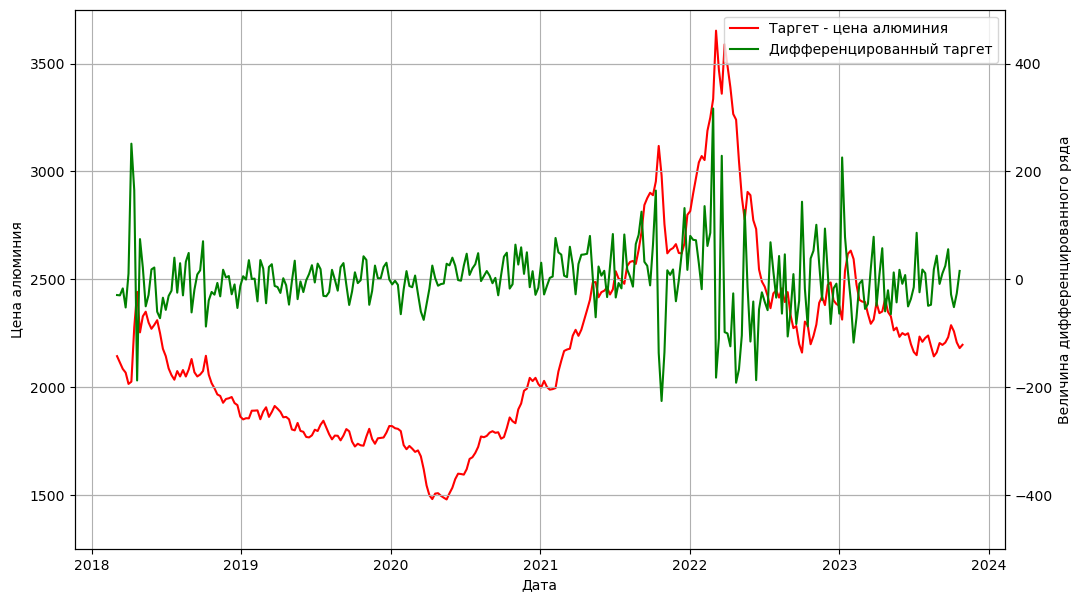

In [225]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.target.values, color='g')
ax1.legend([l1,l2],['Таргет - цена алюминия', 'Дифференцированный таргет'])
ax.set_ylim(1250,3750)
ax.set_ylabel('Цена алюминия')
ax.grid(True)
ax1.set_ylim(-500,500)
ax1.set_ylabel('Величина дифференцированного ряда')
ax1.grid(True)
ax.set_xlabel('Дата');

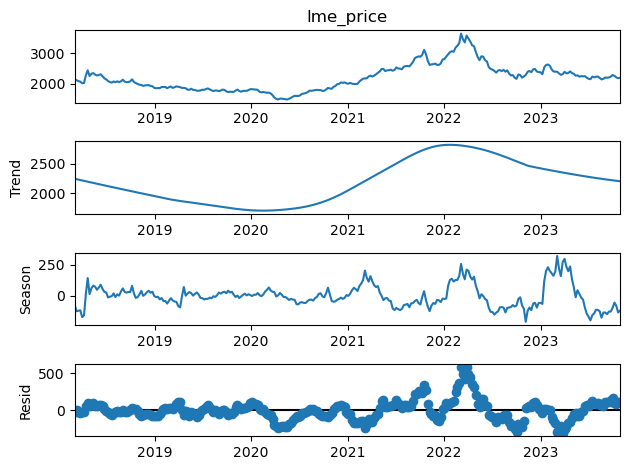

In [232]:
# Проанализируем таргет на тренд и сезонность с помощью алгоритма STL
stl = STL(dataset_per_week.lme_price, period=52)
res = stl.fit()
#plt.figure(figsize=(12,7))
fig = res.plot()

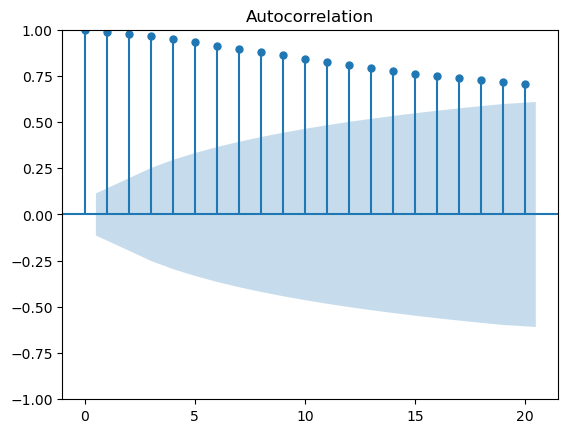

In [233]:
plot_acf(dataset_per_week.lme_price, lags = 20)
plt.show()

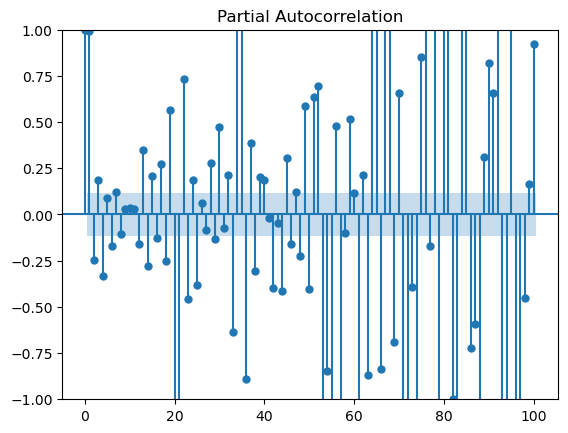

In [235]:
plot_pacf(dataset_per_week.lme_price, method='yw', lags = 100)
plt.show()

In [245]:
# Визуализируем ряды

In [259]:
dataset_per_week.describe().loc['mean'].sort_values()

rub_to_cny_change           -3.810521e-02
bloomberg_metals_change      7.870656e-03
lme_change                   8.167230e-03
rual_price_change            6.154488e-02
sp_metals_change             6.395849e-02
ftse_index_change            8.385811e-02
rub_to_cny                   9.670689e-02
china_inflation_value        1.391409e-01
target                       1.787530e-01
usa_inflation_value          3.100386e-01
rus_inflation_value          5.300869e-01
USD_EUR_rate                 8.909600e-01
china_gdp_increment_value    1.319208e+00
usa_bid_value                1.895753e+00
usa_gdp_increment_value      2.225676e+00
eu_inflation_value           2.512838e+00
australia_inflation          3.211293e+00
chalco_adj                   3.264403e+00
chalco_price                 3.333306e+00
china_bid_value              3.936100e+00
brazil_inflation             5.534923e+00
hongqiao_adj                 5.800651e+00
USD_CNY_rate                 6.780309e+00
hongqiao_price               7.144

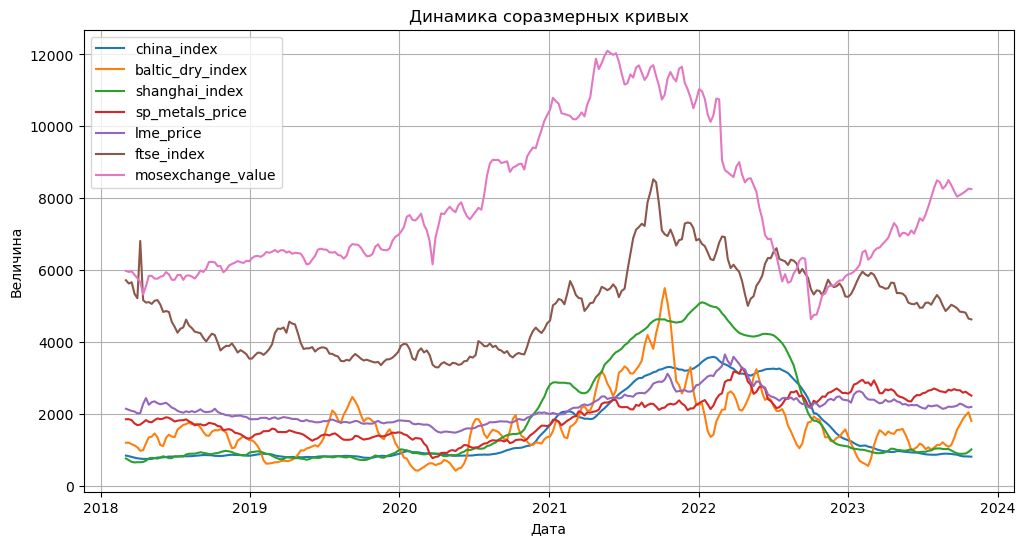

In [287]:
plt.figure(figsize=(12, 6))
for column in ['china_index', 'baltic_dry_index', 'shanghai_index', 'sp_metals_price', 'lme_price', 'ftse_index', 'mosexchange_value']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика соразмерных кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

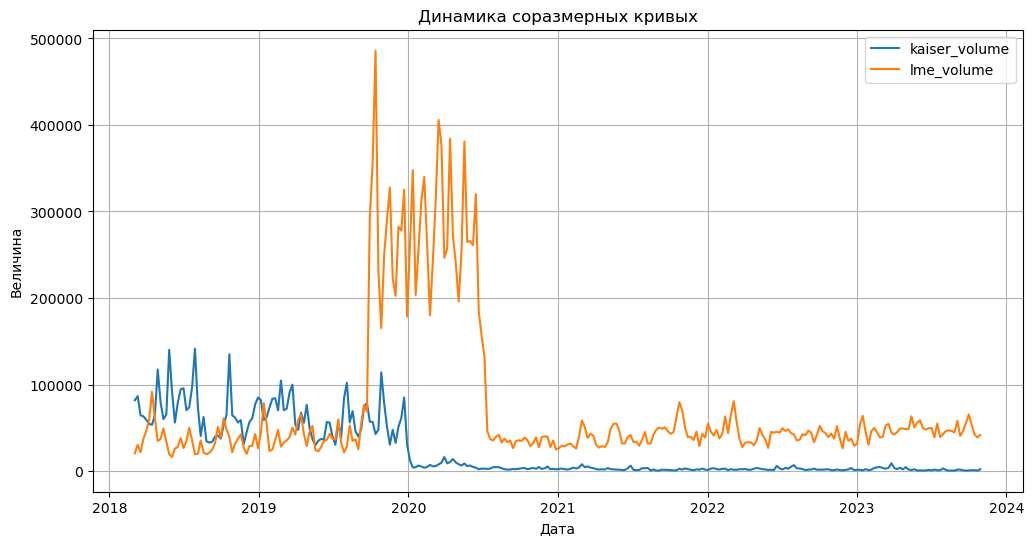

In [288]:
plt.figure(figsize=(12, 6))
for column in ['kaiser_volume', 'lme_volume']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика соразмерных кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

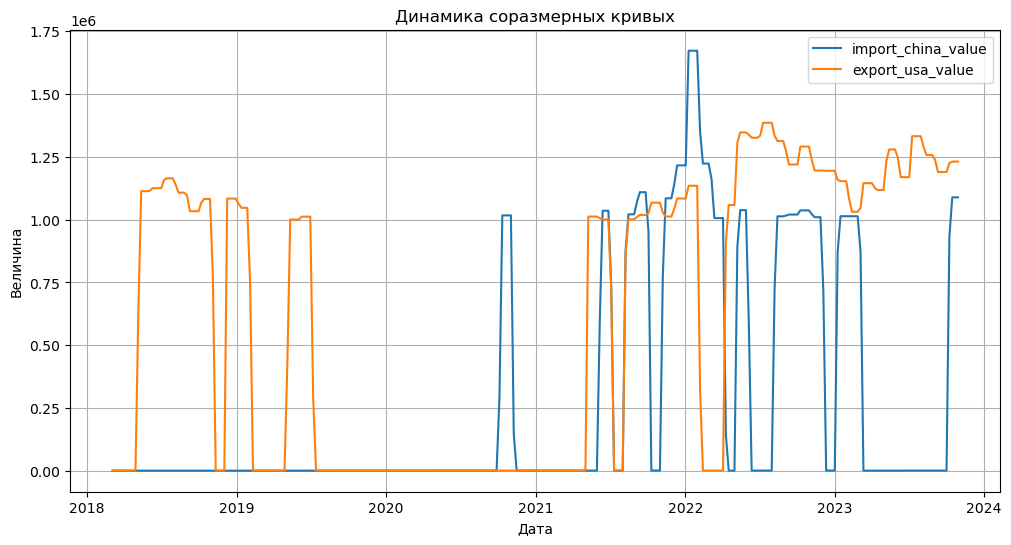

In [266]:
plt.figure(figsize=(12, 6))
for column in ['import_china_value', 'export_usa_value']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика соразмерных кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

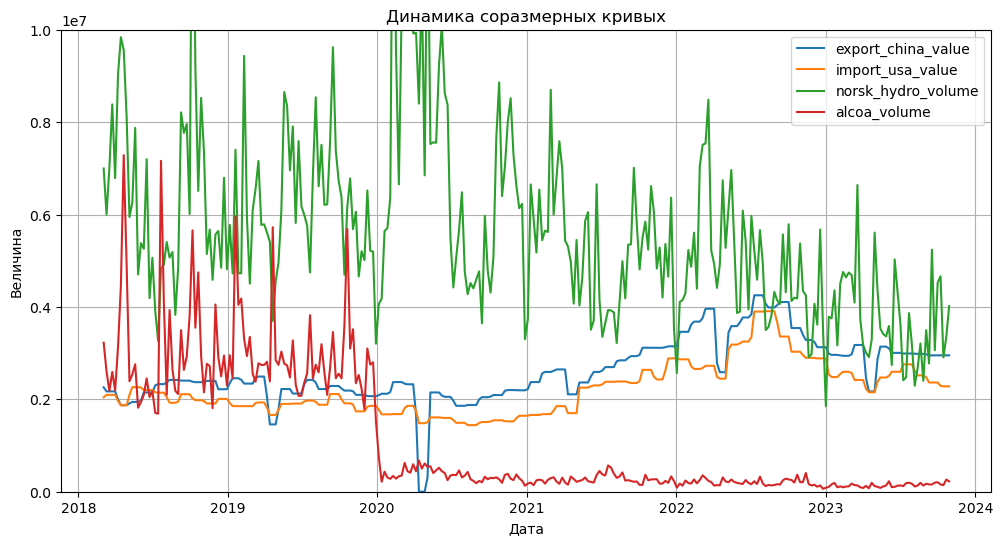

In [264]:
plt.figure(figsize=(12, 6))
for column in ['export_china_value', 'import_usa_value', 'norsk_hydro_volume', 'alcoa_volume']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика соразмерных кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.ylim(0.0, 1e7)
plt.legend()
plt.grid(True)
plt.show()

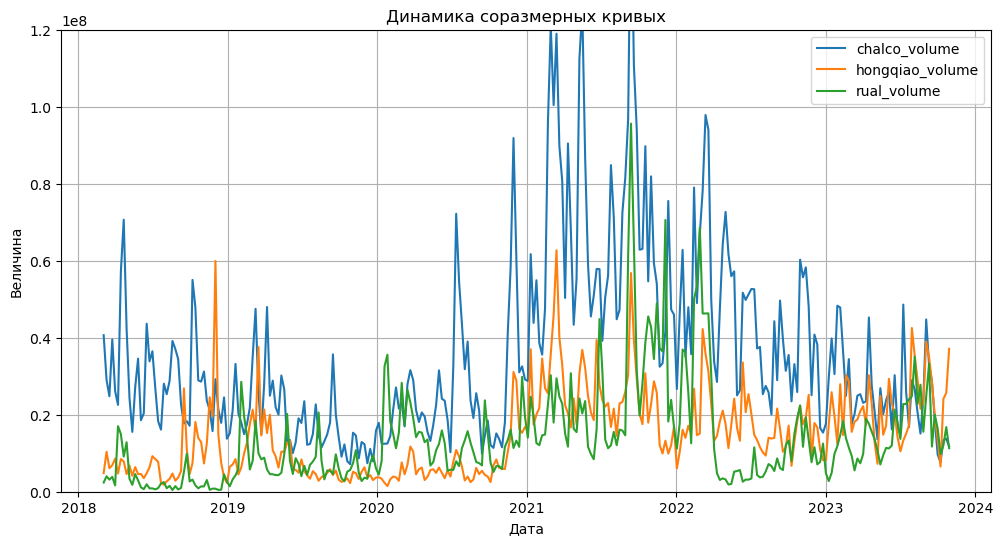

In [263]:
plt.figure(figsize=(12, 6))
for column in ['chalco_volume', 'hongqiao_volume', 'rual_volume']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика соразмерных кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.ylim(0.0, 1.2e8)
plt.legend()
plt.grid(True)
plt.show()

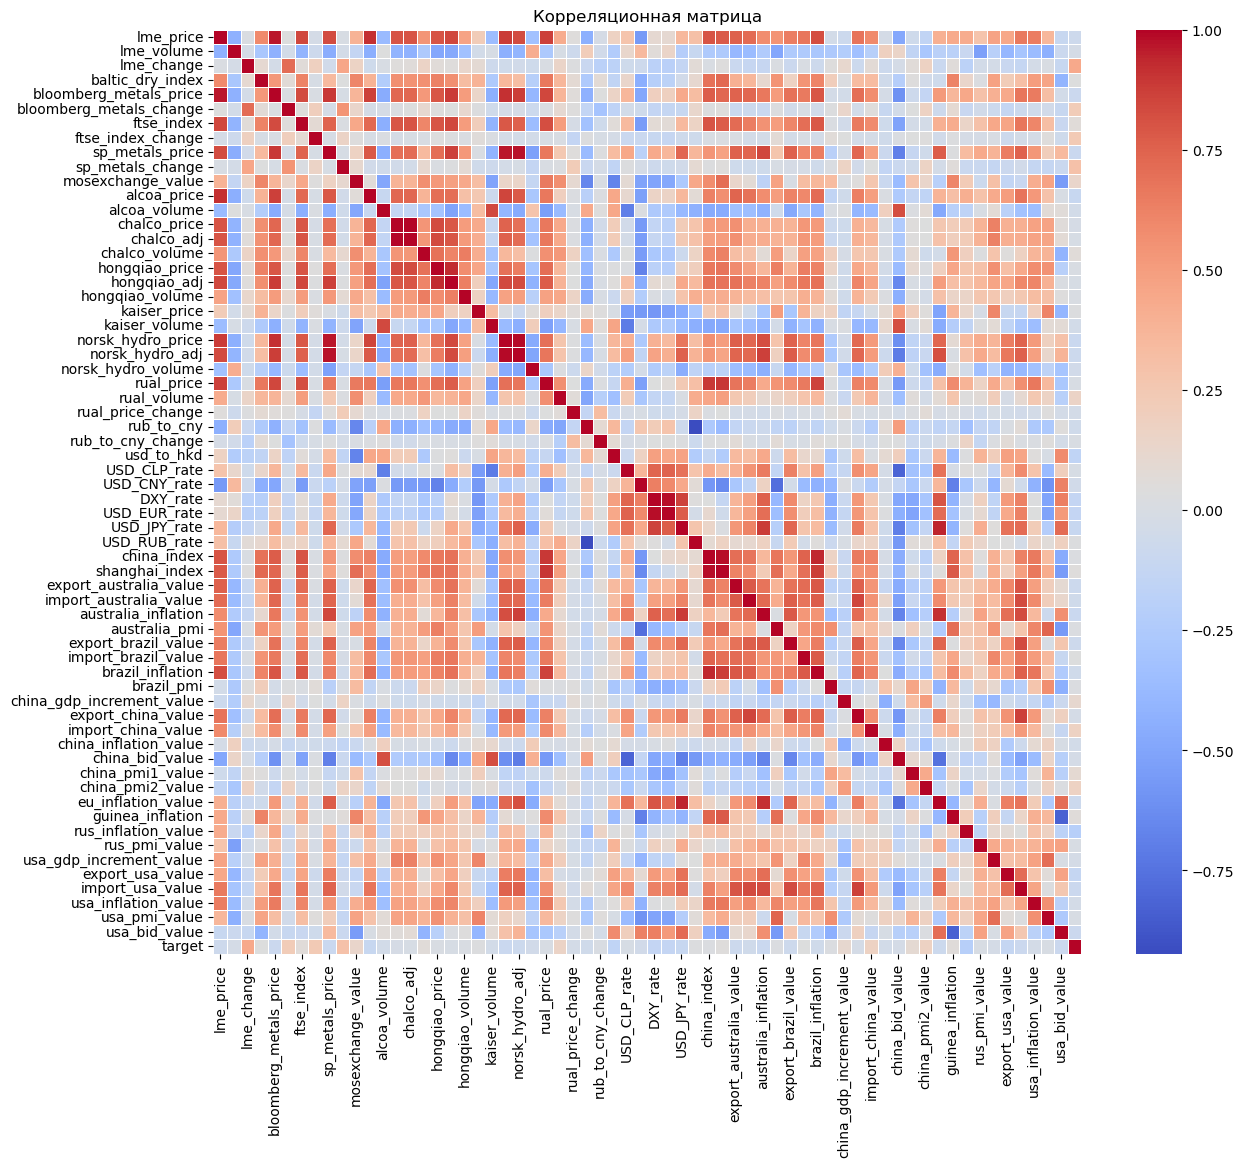

In [275]:
# Вычисление корреляций между продажами
correlation_matrix = dataset_per_week.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [310]:
t = dataset_per_week.corr(method='spearman')
t.target[abs(t.target)>0.2]

lme_change                 0.474208
bloomberg_metals_change    0.397356
sp_metals_change           0.325985
usd_to_hkd                -0.202247
DXY_rate                  -0.202043
target                     1.000000
Name: target, dtype: float64

In [311]:
t = dataset_per_week.corr()
t.target[abs(t.target)>0.2]

lme_change                 0.437064
bloomberg_metals_change    0.220550
ftse_index_change          0.239220
sp_metals_change           0.295293
rus_inflation_value       -0.208536
target                     1.000000
Name: target, dtype: float64

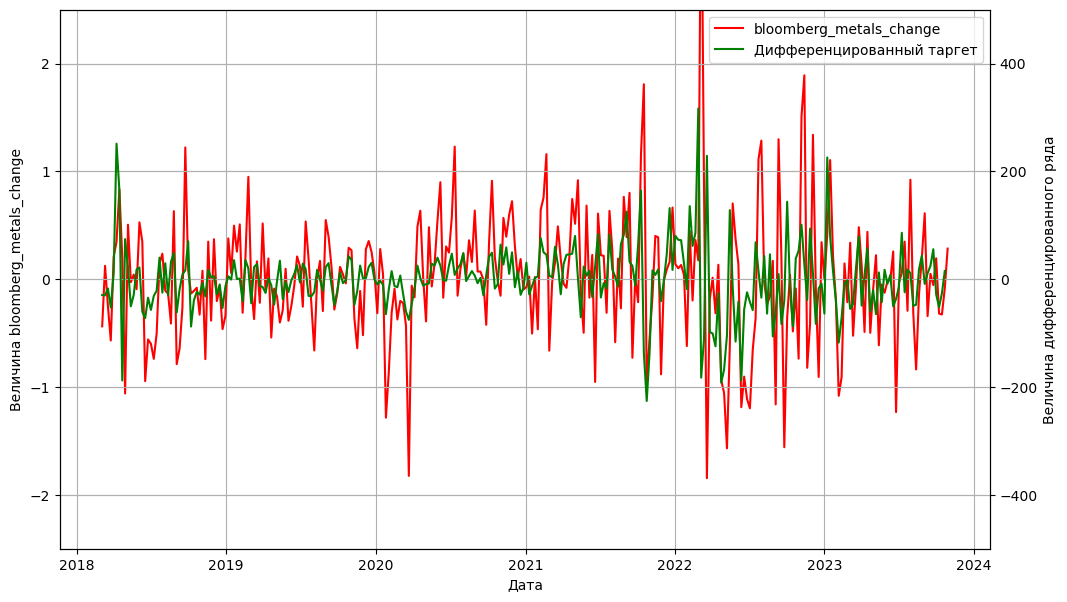

In [284]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.bloomberg_metals_change.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.target.values, color='g')
ax1.legend([l1,l2],['bloomberg_metals_change', 'Дифференцированный таргет'])
ax.set_ylim(-2.5,2.5)
ax.set_ylabel('Величина bloomberg_metals_change')
ax.grid(True)
ax1.set_ylim(-500,500)
ax1.set_ylabel('Величина дифференцированного ряда')
ax1.grid(True)
ax.set_xlabel('Дата');

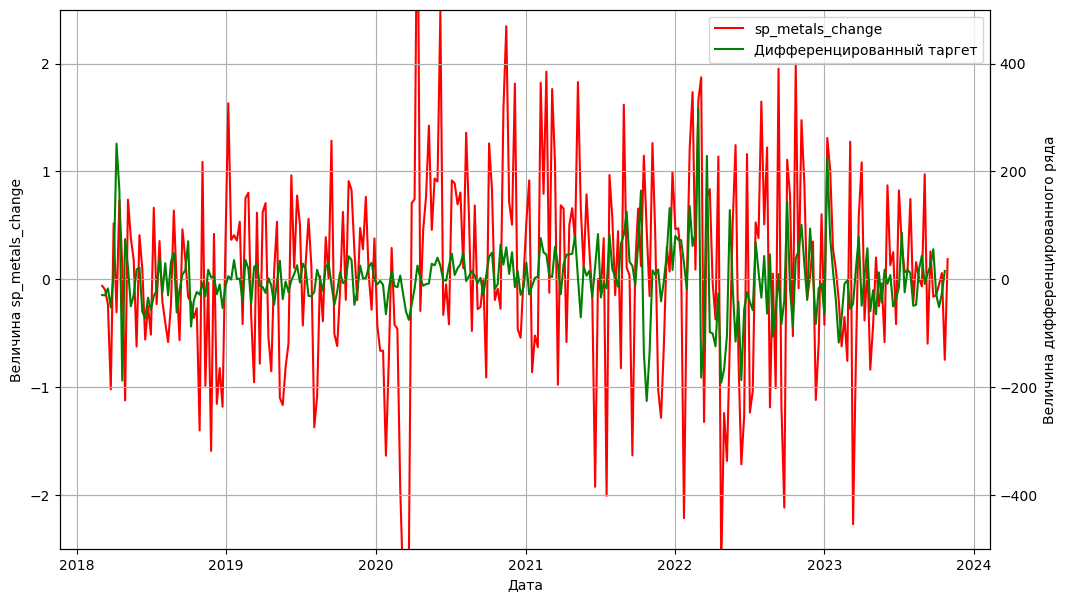

In [280]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.sp_metals_change.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.target.values, color='g')
ax1.legend([l1,l2],['sp_metals_change', 'Дифференцированный таргет'])
ax.set_ylim(-2.5,2.5)
ax.set_ylabel('Величина sp_metals_change')
ax.grid(True)
ax1.set_ylim(-500,500)
ax1.set_ylabel('Величина дифференцированного ряда')
ax1.grid(True)
ax.set_xlabel('Дата');

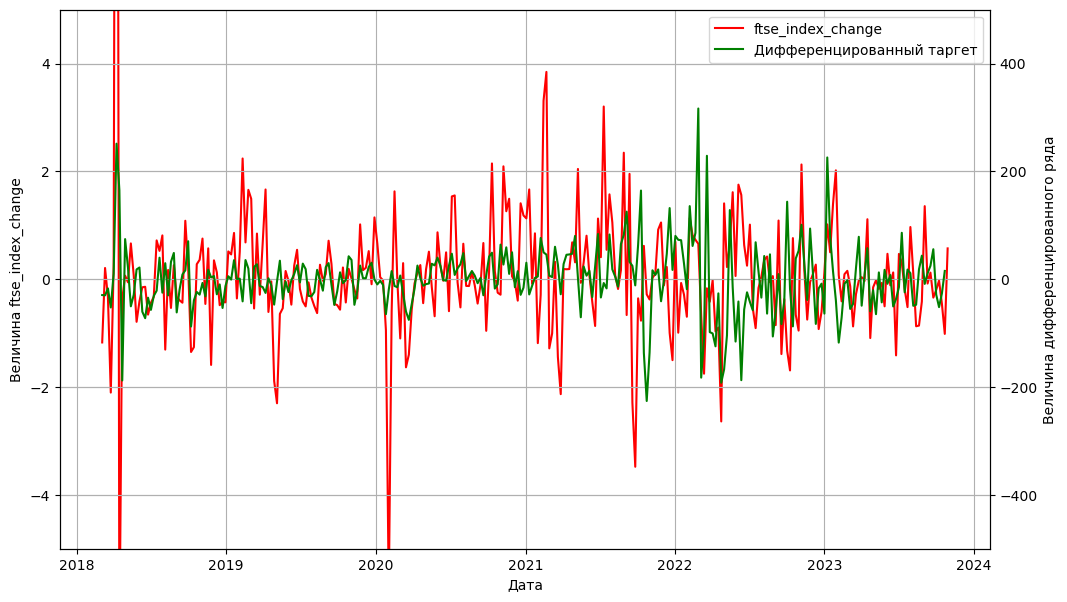

In [286]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.ftse_index_change.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.target.values, color='g')
ax1.legend([l1,l2],['ftse_index_change', 'Дифференцированный таргет'])
ax.set_ylim(-5,5)
ax.set_ylabel('Величина ftse_index_change')
ax.grid(True)
ax1.set_ylim(-500,500)
ax1.set_ylabel('Величина дифференцированного ряда')
ax1.grid(True)
ax.set_xlabel('Дата');

Введем агрегации

In [334]:
list_of_columns = dataset_per_week.columns.copy()
list_of_columns = list_of_columns[:-1]
list_of_columns

Index(['lme_price', 'lme_volume', 'lme_change', 'baltic_dry_index',
       'bloomberg_metals_price', 'bloomberg_metals_change', 'ftse_index',
       'ftse_index_change', 'sp_metals_price', 'sp_metals_change',
       'mosexchange_value', 'alcoa_price', 'alcoa_volume', 'chalco_price',
       'chalco_adj', 'chalco_volume', 'hongqiao_price', 'hongqiao_adj',
       'hongqiao_volume', 'kaiser_price', 'kaiser_volume', 'norsk_hydro_price',
       'norsk_hydro_adj', 'norsk_hydro_volume', 'rual_price', 'rual_volume',
       'rual_price_change', 'rub_to_cny', 'rub_to_cny_change', 'usd_to_hkd',
       'USD_CLP_rate', 'USD_CNY_rate', 'DXY_rate', 'USD_EUR_rate',
       'USD_JPY_rate', 'USD_RUB_rate', 'china_index', 'shanghai_index',
       'export_australia_value', 'import_australia_value',
       'australia_inflation', 'australia_pmi', 'export_brazil_value',
       'import_brazil_value', 'brazil_inflation', 'brazil_pmi',
       'china_gdp_increment_value', 'export_china_value', 'import_china_value'

In [335]:
for j in list_of_columns:
    for i in ['mean_4', 'mean_9', 'mean_13', 'mean_26', 'mean_52']:
        dataset_per_week[j+'_'+i] = dataset_per_week[j].rolling(int(i.split('_')[-1]), min_periods=1).mean()
    for i in ['std_4', 'std_9', 'std_13', 'std_26']:
        dataset_per_week[j+'_'+i] = dataset_per_week[j].rolling(int(i.split('_')[-1]), min_periods=1).std()
    for i in [4,9,13,26]:
        dataset_per_week[j+'_relative_change_by_mean_'+str(i)] = dataset_per_week[j]/dataset_per_week[j+'_mean_'+str(i)]
        dataset_per_week[j+'_increment_by_mean_'+str(i)] = dataset_per_week[j]-dataset_per_week[j+'_mean_'+str(i)]
        dataset_per_week[j+'_relative_change_by_std_'+str(i)] = dataset_per_week[j]/dataset_per_week[j+'_std_'+str(i)]
        dataset_per_week[j+'_delta_relative_change_by_mean_'+str(i)] = (dataset_per_week[j].shift(-1) - dataset_per_week[j])/dataset_per_week[j+'_mean_'+str(i)]
        dataset_per_week[j+'_delta_relative_change_by_std_'+str(i)] = (dataset_per_week[j].shift(-1) - dataset_per_week[j])/dataset_per_week[j+'_std_'+str(i)]


/var/folders/yg/41_1n3fs6z16hqb8_j7dpyjr0000gn/T/ipykernel_39648/2166037982.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset_per_week[j+'_relative_change_by_std_'+str(i)] = dataset_per_week[j]/dataset_per_week[j+'_std_'+str(i)]
/var/folders/yg/41_1n3fs6z16hqb8_j7dpyjr0000gn/T/ipykernel_39648/2166037982.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset_per_week[j+'_delta_relative_change_by_mean_'+str(i)] = (dataset_per_week[j].shift(-1) - dataset_per_week[j])/dataset_per_week[j+'_mean_'+str(i)]
/var/folders/

In [327]:
dataset_per_week.shape

(296, 1891)

<Axes: xlabel='target', ylabel='Count'>

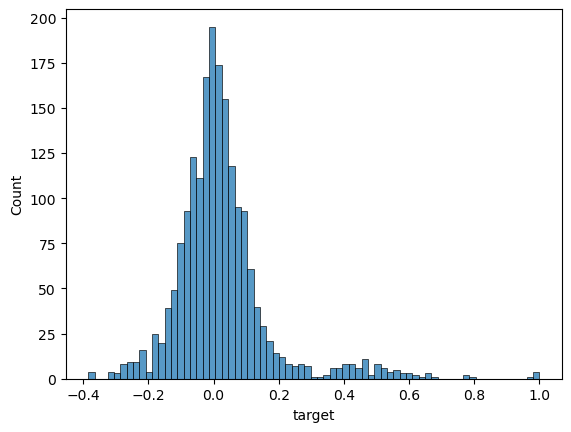

In [336]:
# Посмотрим, как распределены корреляции признаков с таргетом
sns.histplot(dataset_per_week.corr().target)

<Axes: xlabel='target', ylabel='Count'>

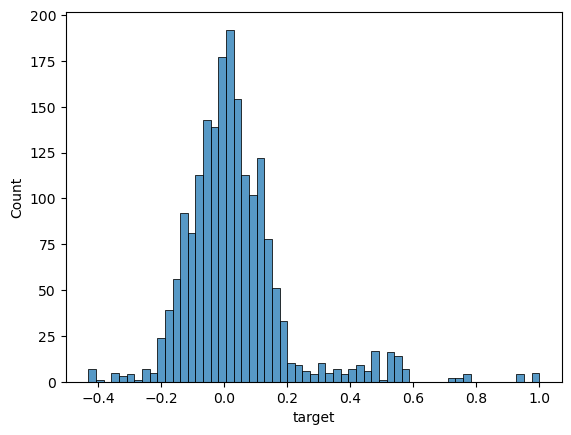

In [337]:
# Посмотрим, как распределены корреляции Спирмена признаков с таргетом
sns.histplot(dataset_per_week.corr(method='spearman').target)

In [346]:
#t = dataset_per_week.corr()
t.target[abs(t.target)>0.6].sort_values()

bloomberg_metals_price_delta_relative_change_by_std_4      0.722496
bloomberg_metals_price_delta_relative_change_by_std_26     0.728261
bloomberg_metals_price_delta_relative_change_by_std_13     0.733701
bloomberg_metals_price_delta_relative_change_by_std_9      0.740629
bloomberg_metals_price_delta_relative_change_by_mean_4     0.761250
bloomberg_metals_price_delta_relative_change_by_mean_9     0.761913
bloomberg_metals_price_delta_relative_change_by_mean_26    0.762535
bloomberg_metals_price_delta_relative_change_by_mean_13    0.762687
lme_price_delta_relative_change_by_std_4                   0.938294
lme_price_delta_relative_change_by_std_13                  0.938463
lme_price_delta_relative_change_by_std_9                   0.943451
lme_price_delta_relative_change_by_std_26                  0.944670
lme_price_delta_relative_change_by_mean_26                 0.996100
lme_price_delta_relative_change_by_mean_13                 0.996388
lme_price_delta_relative_change_by_mean_9       

In [345]:
#t = dataset_per_week.corr(method='spearman')
t.target[abs(t.target)>0.6].sort_values()

bloomberg_metals_price_delta_relative_change_by_std_4      0.722496
bloomberg_metals_price_delta_relative_change_by_std_26     0.728261
bloomberg_metals_price_delta_relative_change_by_std_13     0.733701
bloomberg_metals_price_delta_relative_change_by_std_9      0.740629
bloomberg_metals_price_delta_relative_change_by_mean_4     0.761250
bloomberg_metals_price_delta_relative_change_by_mean_9     0.761913
bloomberg_metals_price_delta_relative_change_by_mean_26    0.762535
bloomberg_metals_price_delta_relative_change_by_mean_13    0.762687
lme_price_delta_relative_change_by_std_4                   0.938294
lme_price_delta_relative_change_by_std_13                  0.938463
lme_price_delta_relative_change_by_std_9                   0.943451
lme_price_delta_relative_change_by_std_26                  0.944670
lme_price_delta_relative_change_by_mean_26                 0.996100
lme_price_delta_relative_change_by_mean_13                 0.996388
lme_price_delta_relative_change_by_mean_9       

In [297]:
# После генерации признаков с помощью агрегаций появились некоторые признаки, которые могут иметь связь с изучаемым таргетом

In [340]:
dataset_per_week.to_csv('../data/processed/df_target_features.csv')

In [ ]:
df = pd.read_csv('../data/processed/df_target_features.csv', parse_dates=True, index_col=0)
df.shape